# Importing Data

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
df_1=pd.read_csv("./bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [3]:
df_2 = pd.read_csv("./Bitstamp_BTCUSD_2021_minute_337366.csv")

/home/jhordymora/.pyenv/versions/lewagon/envs/crypto/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Preprocessing - Standarizing dataframes with same columns

## df_2 data Preparation

In [4]:
df_2

,,,,,,,,https://www.CryptoDataDownload.com
unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
1629701040,2021-08-23 06:44:00,BTC/USD,50139.68,50139.68,50139.68,50139.68,0.00000000,0.0
1629700980,2021-08-23 06:43:00,BTC/USD,50144.09,50144.09,50133.18,50139.68,1.87875000,94199.92379999999
1629700920,2021-08-23 06:42:00,BTC/USD,50140.78,50140.78,50120.62,50120.62,0.02177000,1091.1258974000002
1629700860,2021-08-23 06:41:00,BTC/USD,50131.78,50135.63,50131.78,50135.63,0.36106794,18102.368644702197
...,...,...,...,...,...,...,...,...
1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.5,1.06235967,30807.89925
1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.4465376,42014.959434
1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.0,29048.13,2.18962055,63604.382387
1609459320,2021-01-01 00:02:00,BTC/USD,29069.8,29073.02,29028.14,29035.89,3.03030144,87987.499279


In [5]:
df_2.drop(columns=["https://www.CryptoDataDownload.com"], inplace=True)

In [6]:
df_2.reset_index(inplace=True)

In [7]:
df_2.columns = df_2.iloc[0]

In [8]:
df_2.drop([0], inplace=True)

In [9]:
df_2.drop(columns=["unix","symbol"], inplace=True)

In [10]:
df_2.rename(columns={"Volume BTC":"volume"}, inplace=True)

In [11]:
df_2

,date,open,high,low,close,volume
1,2021-08-23 06:44:00,50139.68,50139.68,50139.68,50139.68,0.00000000
2,2021-08-23 06:43:00,50144.09,50144.09,50133.18,50139.68,1.87875000
3,2021-08-23 06:42:00,50140.78,50140.78,50120.62,50120.62,0.02177000
4,2021-08-23 06:41:00,50131.78,50135.63,50131.78,50135.63,0.36106794
5,2021-08-23 06:40:00,50072.44,50134.08,50072.44,50131.08,0.46310000
...,...,...,...,...,...,...
337360,2021-01-01 00:05:00,29021.86,29023.38,28982.33,28999.5,1.06236
337361,2021-01-01 00:04:00,29048.13,29057.73,29035.61,29045.19,1.446538
337362,2021-01-01 00:03:00,29037.68,29069.39,29019.0,29048.13,2.189621
337363,2021-01-01 00:02:00,29069.8,29073.02,29028.14,29035.89,3.030301


In [12]:
df_2["open"]=df_2.open.astype(float)
df_2["high"]=df_2.high.astype(float)
df_2["low"]=df_2.low.astype(float)
df_2["close"]=df_2.close.astype(float)
df_2["volume"]=df_2.volume.astype(float)
df_2["date"]= pd.to_datetime(df_2["date"], format='%Y-%m-%d %H:%M:%S.%f')

In [13]:
df_2.dtypes

0
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object

In [14]:
df_2=df_2.iloc[::-1]

In [15]:
df_2.reset_index(inplace=True)
df_2.drop(columns=["index"], inplace=True)

In [16]:
df_2

,date,open,high,low,close,volume
0,2021-01-01 00:01:00,29007.31,29086.90,29007.31,29083.47,14.561951
1,2021-01-01 00:02:00,29069.80,29073.02,29028.14,29035.89,3.030301
2,2021-01-01 00:03:00,29037.68,29069.39,29019.00,29048.13,2.189621
3,2021-01-01 00:04:00,29048.13,29057.73,29035.61,29045.19,1.446538
4,2021-01-01 00:05:00,29021.86,29023.38,28982.33,28999.50,1.062360
...,...,...,...,...,...,...
337359,2021-08-23 06:40:00,50072.44,50134.08,50072.44,50131.08,0.463100
337360,2021-08-23 06:41:00,50131.78,50135.63,50131.78,50135.63,0.361068
337361,2021-08-23 06:42:00,50140.78,50140.78,50120.62,50120.62,0.021770
337362,2021-08-23 06:43:00,50144.09,50144.09,50133.18,50139.68,1.878750


## df_1 Data Preparation

In [17]:
df_1.drop(columns=["Volume_(Currency)","Weighted_Price"], inplace=True)

In [18]:
df_1.rename(columns={"Timestamp": "date",
                     "Open": "open",
                     "High":"high",
                     "Low":"low",
                     "Close":"close",
                     "Volume_(BTC)":"volume"}, 
            inplace=True
                     )

In [19]:
for row in range(len(df_1["date"])):
    df_1["date"][row]=datetime.fromtimestamp(df_1["date"][row])

/tmp/ipykernel_14253/1887864048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["date"][row]=datetime.fromtimestamp(df_1["date"][row])


In [20]:
df_1["date"]= pd.to_datetime(df_1["date"], format='%Y-%m-%d %H:%M:%S.%f')

In [21]:
df_1.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object

In [22]:
df_1

,date,open,high,low,close,volume
0,2011-12-31 08:52:00,4.39,4.39,4.39,4.39,0.455581
1,2011-12-31 08:53:00,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 08:54:00,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 08:55:00,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 08:56:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4857372,2021-03-31 01:56:00,58714.31,58714.31,58686.00,58686.00,1.384487
4857373,2021-03-31 01:57:00,58683.97,58693.43,58683.97,58685.81,7.294848
4857374,2021-03-31 01:58:00,58693.43,58723.84,58693.43,58723.84,1.705682
4857375,2021-03-31 01:59:00,58742.18,58770.38,58742.18,58760.59,0.720415


# Joining Tables

## Comparing Data

In [23]:
df_1.loc[[4857376]]

,date,open,high,low,close,volume
4857376,2021-03-31 02:00:00,58767.75,58778.18,58755.97,58778.18,2.712831


In [24]:
df_2[df_2["date"]=="2021-03-31 02:00:00"]

,date,open,high,low,close,volume
128279,2021-03-31 02:00:00,58915.87,58921.36,58900.64,58911.25,0.041504


There are differences between the data, so for that reason is possible that the result can be affected.
In this case we will preserve the data with more information and complement (adding) the data with the table which has less  information.

## Modifing df_2 with the data needed

In [25]:
index = df_2[df_2["date"]=="2021-03-31 02:00:00"].index

In [26]:
list_index_for_deleting = [number_row for number_row in range(index[0]+1)]

In [27]:
df_2.drop(index=list_index_for_deleting, axis=0,inplace=True)

In [28]:
df_2.reset_index()

,index,date,open,high,low,close,volume
0,128280,2021-03-31 02:01:00,58911.25,58955.75,58911.25,58937.88,1.339921
1,128281,2021-03-31 02:02:00,58931.57,58937.88,58900.64,58918.03,0.786529
2,128282,2021-03-31 02:03:00,58883.80,58904.98,58868.39,58871.90,0.740808
3,128283,2021-03-31 02:04:00,58877.30,58880.86,58819.30,58880.86,1.247881
4,128284,2021-03-31 02:05:00,58870.56,58888.32,58808.82,58862.92,1.970336
...,...,...,...,...,...,...,...
209079,337359,2021-08-23 06:40:00,50072.44,50134.08,50072.44,50131.08,0.463100
209080,337360,2021-08-23 06:41:00,50131.78,50135.63,50131.78,50135.63,0.361068
209081,337361,2021-08-23 06:42:00,50140.78,50140.78,50120.62,50120.62,0.021770
209082,337362,2021-08-23 06:43:00,50144.09,50144.09,50133.18,50139.68,1.878750


In [29]:
df_2

,date,open,high,low,close,volume
128280,2021-03-31 02:01:00,58911.25,58955.75,58911.25,58937.88,1.339921
128281,2021-03-31 02:02:00,58931.57,58937.88,58900.64,58918.03,0.786529
128282,2021-03-31 02:03:00,58883.80,58904.98,58868.39,58871.90,0.740808
128283,2021-03-31 02:04:00,58877.30,58880.86,58819.30,58880.86,1.247881
128284,2021-03-31 02:05:00,58870.56,58888.32,58808.82,58862.92,1.970336
...,...,...,...,...,...,...
337359,2021-08-23 06:40:00,50072.44,50134.08,50072.44,50131.08,0.463100
337360,2021-08-23 06:41:00,50131.78,50135.63,50131.78,50135.63,0.361068
337361,2021-08-23 06:42:00,50140.78,50140.78,50120.62,50120.62,0.021770
337362,2021-08-23 06:43:00,50144.09,50144.09,50133.18,50139.68,1.878750


## Joining table with concatenate

In [30]:
final_df =df_1.append(df_2)

In [31]:
final_df

,date,open,high,low,close,volume
0,2011-12-31 08:52:00,4.39,4.39,4.39,4.39,0.455581
1,2011-12-31 08:53:00,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 08:54:00,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 08:55:00,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 08:56:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
337359,2021-08-23 06:40:00,50072.44,50134.08,50072.44,50131.08,0.463100
337360,2021-08-23 06:41:00,50131.78,50135.63,50131.78,50135.63,0.361068
337361,2021-08-23 06:42:00,50140.78,50140.78,50120.62,50120.62,0.021770
337362,2021-08-23 06:43:00,50144.09,50144.09,50133.18,50139.68,1.878750


## Exporting to csv

In [32]:
#final_df.to_csv("../data/BTCUSD_2011-12-31-08:52_to_2021-08-23-06:44_Not_Clean.csv")

# Data Cleaning

## Counting null and NaN Values

In [33]:
final_df.isnull().sum()

date            0
open      1243608
high      1243608
low       1243608
close     1243608
volume    1243608
dtype: int64

In [34]:
final_df.isna().sum()

date            0
open      1243608
high      1243608
low       1243608
close     1243608
volume    1243608
dtype: int64

In [35]:
final_df.dropna(inplace=True)

In [36]:
final_df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [37]:
final_df.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [38]:
final_df.describe()

,open,high,low,close,volume
count,3.822853e+06,3.822853e+06,3.822853e+06,3.822853e+06,3.822853e+06
mean,8.072087e+03,8.077743e+03,8.066234e+03,8.072092e+03,8.981574e+00
std,1.246638e+04,1.247526e+04,1.245738e+04,1.246650e+04,2.977980e+01
min,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00
25%,4.571300e+02,4.574800e+02,4.569900e+02,4.571400e+02,4.040000e-01
50%,3.972830e+03,3.974140e+03,3.971710e+03,3.972940e+03,1.899120e+00
75%,9.275720e+03,9.280160e+03,9.271030e+03,9.275780e+03,6.952678e+00
max,6.484286e+04,6.489522e+04,6.473125e+04,6.485930e+04,5.853852e+03


In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3822853 entries, 0 to 337363
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   open    float64       
 2   high    float64       
 3   low     float64       
 4   close   float64       
 5   volume  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 204.2 MB


After dropping NaN we have lost 1,243,608 (5,066,461 - 3,822,853) data points, so we have to decided if we want to replace it with another value like a mean or just work without this information.

**My opinion:** we should work without this values because this have being changing along the time and if we replace the values with the mean or other strategy it can create outliers in that time frame.

## Dropping Duplicates

In [40]:
final_df.drop_duplicates(inplace=True)

In [41]:
final_df.reset_index(inplace=True)
final_df.drop(columns = ["index"], inplace=True)

In [42]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822853 entries, 0 to 3822852
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   open    float64       
 2   high    float64       
 3   low     float64       
 4   close   float64       
 5   volume  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 175.0 MB


## Exporting to csv

In [43]:
#final_df.to_csv("../data/BTCUSD_2011-12-31-08:52_to_2021-08-23-06:44_Clean.csv")

## Outliers

<AxesSubplot:>

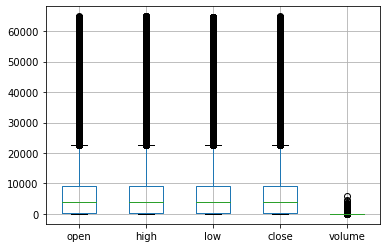

In [44]:
final_df[["open", "high","low","close","volume"]].boxplot()

Using Log we are gonna see the percentage change of the different features

In [45]:
temp = ["open", "high","low","close"]
for x in temp:
    final_df[f'log_{x}'] = final_df[x].apply(lambda x: np.log(x))

Volume is not being taking into account because it can has 0 values and when the log is apply, the result will be infinity

In [46]:
final_df_log = final_df[["date","log_open","log_high","log_low","log_close","volume"]]
final_df_log

,date,log_open,log_high,log_low,log_close,volume
0,2011-12-31 08:52:00,1.479329,1.479329,1.479329,1.479329,0.455581
1,2011-12-31 16:50:00,1.479329,1.479329,1.479329,1.479329,48.000000
2,2011-12-31 17:59:00,1.504077,1.519513,1.504077,1.519513,37.862297
3,2011-12-31 18:00:00,1.521699,1.521699,1.521699,1.521699,9.000000
4,2012-01-01 05:16:00,1.521699,1.521699,1.521699,1.521699,1.502000
...,...,...,...,...,...,...
3822848,2021-08-23 06:40:00,10.821226,10.822456,10.821226,10.822396,0.463100
3822849,2021-08-23 06:41:00,10.822410,10.822487,10.822410,10.822487,0.361068
3822850,2021-08-23 06:42:00,10.822590,10.822590,10.822188,10.822188,0.021770
3822851,2021-08-23 06:43:00,10.822656,10.822656,10.822438,10.822568,1.878750


<AxesSubplot:>

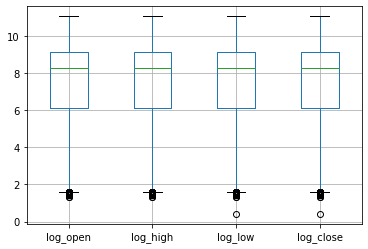

In [47]:
final_df_log[["log_open","log_high","log_low","log_close"]].boxplot()

⚠️**<font color=red>Warning:</font> It is necessary to think how to combine log prices values and the volume.**⚠️

# Function for time interval selection

In [48]:
final_df.tail()

,date,open,high,low,close,volume,log_open,log_high,log_low,log_close
3822848,2021-08-23 06:40:00,50072.44,50134.08,50072.44,50131.08,0.463100,10.821226,10.822456,10.821226,10.822396
3822849,2021-08-23 06:41:00,50131.78,50135.63,50131.78,50135.63,0.361068,10.822410,10.822487,10.822410,10.822487
3822850,2021-08-23 06:42:00,50140.78,50140.78,50120.62,50120.62,0.021770,10.822590,10.822590,10.822188,10.822188
3822851,2021-08-23 06:43:00,50144.09,50144.09,50133.18,50139.68,1.878750,10.822656,10.822656,10.822438,10.822568
3822852,2021-08-23 06:44:00,50139.68,50139.68,50139.68,50139.68,0.000000,10.822568,10.822568,10.822568,10.822568


In [49]:
def time_selection(df, timeframe):
    """
    This function filter the data points in the choosed dataframe.
    The timeframe has to be choosen in this way. The first element is an interger and the second one is a letter, 
    which denotes the timeframe. M is for Months and m is for minutes.
    The smallest timeframe is a minites and the highest is months.
    For instance 5m (5 minutes), 5H (5 hours), 5D (5 days), 5M (5 months) and 5Y (5 years).
    It will return the dataframe with the specified parameters.
    """
    if "m" in timeframe:
        timeframe_list = [char for char in timeframe]
        minutes = int(timeframe_list[0])
        return df[df['date'].dt.minute%minutes==0].dropna()
    else:
        return df.set_index("date").resample(timeframe).mean().dropna().reset_index()

In [50]:
df = final_df
df_4m =time_selection(df, "4m")
df_4m

,date,open,high,low,close,volume,log_open,log_high,log_low,log_close
0,2011-12-31 08:52:00,4.39,4.39,4.39,4.39,0.455581,1.479329,1.479329,1.479329,1.479329
3,2011-12-31 18:00:00,4.58,4.58,4.58,4.58,9.000000,1.521699,1.521699,1.521699,1.521699
4,2012-01-01 05:16:00,4.58,4.58,4.58,4.58,1.502000,1.521699,1.521699,1.521699,1.521699
5,2012-01-01 16:28:00,4.84,4.84,4.84,4.84,10.000000,1.576915,1.576915,1.576915,1.576915
7,2012-01-02 21:04:00,5.00,5.00,5.00,5.00,19.048000,1.609438,1.609438,1.609438,1.609438
...,...,...,...,...,...,...,...,...,...,...
3822836,2021-08-23 06:28:00,50162.33,50162.33,50126.62,50132.78,0.938782,10.823020,10.823020,10.822307,10.822430
3822840,2021-08-23 06:32:00,50116.55,50145.82,50094.39,50145.82,1.334127,10.822107,10.822690,10.821664,10.822690
3822844,2021-08-23 06:36:00,50131.47,50141.08,50119.12,50141.08,0.004330,10.822404,10.822596,10.822158,10.822596
3822848,2021-08-23 06:40:00,50072.44,50134.08,50072.44,50131.08,0.463100,10.821226,10.822456,10.821226,10.822396


In [51]:
df = final_df
df_4H =time_selection(df, "4H")
df_4H

,date,open,high,low,close,volume,log_open,log_high,log_low,log_close
0,2011-12-31 08:00:00,4.390000,4.390000,4.390000,4.390000,0.455581,1.479329,1.479329,1.479329,1.479329
1,2011-12-31 16:00:00,4.490000,4.513333,4.490000,4.513333,31.620766,1.501702,1.506847,1.501702,1.506847
2,2012-01-01 04:00:00,4.580000,4.580000,4.580000,4.580000,1.502000,1.521699,1.521699,1.521699,1.521699
3,2012-01-01 16:00:00,4.840000,4.840000,4.840000,4.840000,10.000000,1.576915,1.576915,1.576915,1.576915
4,2012-01-01 20:00:00,5.000000,5.000000,5.000000,5.000000,10.100000,1.609438,1.609438,1.609438,1.609438
...,...,...,...,...,...,...,...,...,...,...
20835,2021-08-22 12:00:00,48769.308417,48787.711375,48749.417500,48769.737750,1.697971,10.794844,10.795222,10.794435,10.794853
20836,2021-08-22 16:00:00,48591.665708,48605.941333,48574.903375,48591.580833,0.463362,10.791204,10.791498,10.790859,10.791202
20837,2021-08-22 20:00:00,48807.713542,48825.874417,48791.558000,48810.168750,0.605696,10.795610,10.795982,10.795279,10.795660
20838,2021-08-23 00:00:00,49779.332208,49803.461792,49759.784208,49783.003708,1.941360,10.815334,10.815818,10.814942,10.815408


In [ ]:
df_4H_normal = df_4H.drop(columns=["log_open","log_high","log_low","log_close"])
df_4H_normal.set_index("date", inplace=True)
df_4H_normal

In [52]:
df = final_df
df_4D =time_selection(df, "4D")
df_4D

,date,open,high,low,close,volume,log_open,log_high,log_low,log_close
0,2011-12-31,4.956250,4.960625,4.956250,4.960625,14.000322,1.598182,1.599146,1.598182,1.599146
1,2012-01-04,6.124444,6.134444,6.124444,6.134444,5.249193,1.808298,1.809977,1.808298,1.809977
2,2012-01-08,6.816897,6.817845,6.816121,6.817069,2.064812,1.918216,1.918346,1.918104,1.918235
3,2012-01-12,6.910169,6.918475,6.893220,6.903898,2.793340,1.931914,1.933088,1.929478,1.930995
4,2012-01-16,6.252436,6.256026,6.247564,6.251154,5.084370,1.831431,1.832014,1.830636,1.831219
...,...,...,...,...,...,...,...,...,...,...
876,2021-08-04,40769.638995,40795.060536,40743.162807,40770.807866,3.074577,10.614408,10.615029,10.613760,10.614435
877,2021-08-08,45240.605734,45265.908592,45214.361021,45241.166240,2.361968,10.719532,10.720092,10.718951,10.719545
878,2021-08-12,46180.120795,46199.252274,46160.013319,46180.476042,1.568402,10.740055,10.740470,10.739618,10.740062
879,2021-08-16,45816.256691,45838.630516,45792.618743,45816.183307,1.861215,10.732170,10.732659,10.731654,10.732169


In [53]:
df = final_df
df_4M =time_selection(df, "4M")
df_4M

,date,open,high,low,close,volume,log_open,log_high,log_low,log_close
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,1.496109,1.499968,1.496109,1.499968
1,2012-04-30,5.326857,5.328634,5.324097,5.326179,13.290481,1.665283,1.665601,1.664766,1.665135
2,2012-08-31,8.534430,8.538500,8.529427,8.533358,23.029300,2.100881,2.101305,2.100386,2.100798
3,2012-12-31,11.865687,11.868062,11.862987,11.865334,21.569429,2.470350,2.470552,2.470119,2.470319
4,2013-04-30,90.587469,90.727620,90.420459,90.579478,15.272837,4.278527,4.279899,4.276910,4.278474
5,2013-08-31,104.706584,104.780558,104.612653,104.693543,10.907521,4.640178,4.640913,4.639271,4.640075
6,2013-12-31,442.300859,443.023002,441.498011,442.276828,19.912517,5.776499,5.777741,5.775092,5.776434
7,2014-04-30,641.224163,641.908052,640.530769,641.242097,16.071845,6.438097,6.439212,6.436968,6.438125
8,2014-08-31,561.714387,562.077941,561.334597,561.715852,8.922144,6.323198,6.323853,6.322518,6.323204
9,2014-12-31,378.761663,379.012371,378.494003,378.756626,12.267621,5.929563,5.930233,5.928847,5.929550


In [54]:
df = final_df
df_4Y =time_selection(df, "4Y")
df_4Y

,date,open,high,low,close,volume,log_open,log_high,log_low,log_close
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,1.496109,1.499968,1.496109,1.499968
1,2015-12-31,352.396845,352.708892,352.060661,352.392951,14.453513,5.595779,5.596558,5.594918,5.595755
2,2019-12-31,5305.383994,5309.273370,5301.101110,5305.278576,7.363012,8.137962,8.138560,8.137307,8.137950
3,2023-12-31,24124.753746,24141.203280,24108.311620,24125.009668,5.336815,9.813415,9.814049,9.812791,9.813425
